In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d noulam/tomato

Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
License(s): copyright-authors
 98% 728M/743M [00:07<00:00, 139MB/s]
100% 743M/743M [00:07<00:00, 105MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tomato.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',target_size=(224,224),batch_size=128,class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',target_size=(224,224),batch_size=128,class_mode='categorical')


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:

conv_base=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))
conv_base.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 14965578 (57.09 MB)
Trainable params: 250890 (980.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(training_set,epochs=10,validation_data=test_set)

<ipython-input-10-3b0a8317fb1c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(training_set,epochs=10,validation_data=test_set)


Epoch 1/10
144/144 [==============================] - 279s 2s/step - loss: 0.9394 - accuracy: 0.7123 - val_loss: 0.5098 - val_accuracy: 0.8351
Epoch 2/10
144/144 [==============================] - 258s 2s/step - loss: 0.4528 - accuracy: 0.8561 - val_loss: 0.5537 - val_accuracy: 0.8083
Epoch 3/10
144/144 [==============================] - 257s 2s/step - loss: 0.3479 - accuracy: 0.8888 - val_loss: 0.3429 - val_accuracy: 0.8866
Epoch 4/10
144/144 [==============================] - 259s 2s/step - loss: 0.2870 - accuracy: 0.9104 - val_loss: 0.3094 - val_accuracy: 0.8957
Epoch 5/10
144/144 [==============================] - 259s 2s/step - loss: 0.2480 - accuracy: 0.9205 - val_loss: 0.3291 - val_accuracy: 0.8842
Epoch 6/10
144/144 [==============================] - 259s 2s/step - loss: 0.2179 - accuracy: 0.9303 - val_loss: 0.2643 - val_accuracy: 0.9117
Epoch 7/10
144/144 [==============================] - 259s 2s/step - loss: 0.2041 - accuracy: 0.9361 - val_loss: 0.2565 - val_accuracy: 0.9106

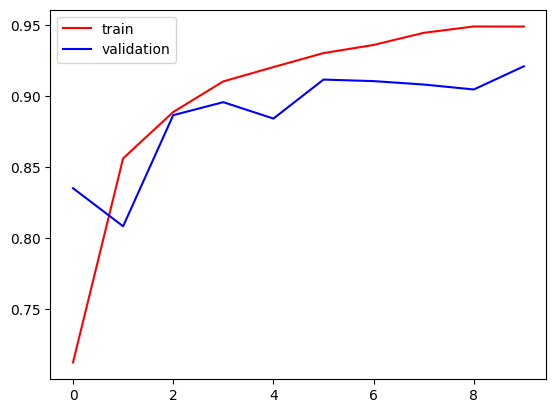

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
class_dict = training_set.class_indices
li = list(class_dict.keys())

In [ ]:
li = list(class_dict.keys())

In [ ]:
path="D:\\"
model.save(path)

Following is our prediction:
1/1 [==============================] - 0s 18ms/step


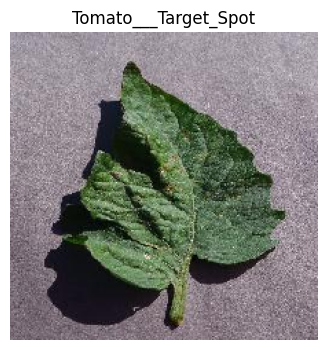

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
image_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Target_Spot/0a458dfc-b513-44f2-a3ce-dab4c3adb939___Com.G_TgS_FL 8166.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()
